In [33]:
# Basic Data Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
from google.colab import files
uploaded = files.upload()

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (1).xlsx


In [35]:
# Summary
df.info()

# Check for null values
df.isnull().sum()

# Describe numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102599.000000,102326.000000,102190.000000,102599.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.290422,125.026924,8.135845,27.434722,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,341.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,912.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.272137,66.325739,30.553781,49.478373,NaN,1.746621,1.284657,32.218780,135.435024


In [36]:
# Drop columns with too many nulls (optional)
df = df.dropna(thresh=0.7*len(df), axis=1)

# Fill missing values
df['price'] = df['price'].fillna(df['price'].median())
df['number of reviews'] = df['number of reviews'].fillna(0)

# Convert columns if needed
df['price'] = df['price'].astype(float)

Exploratory Data Analysis (EDA)

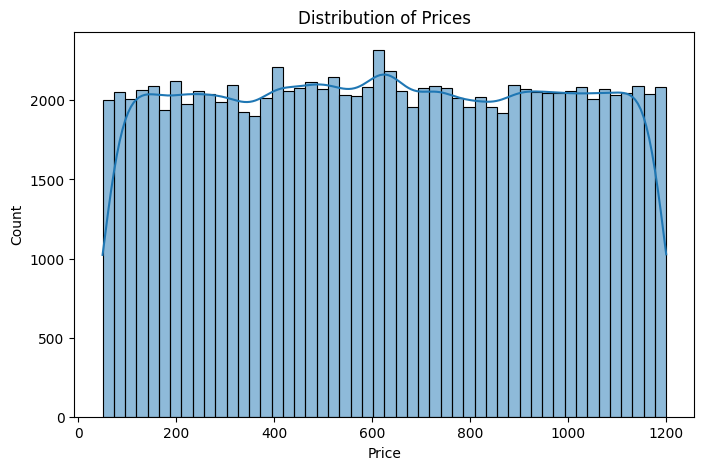

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Room Type Count

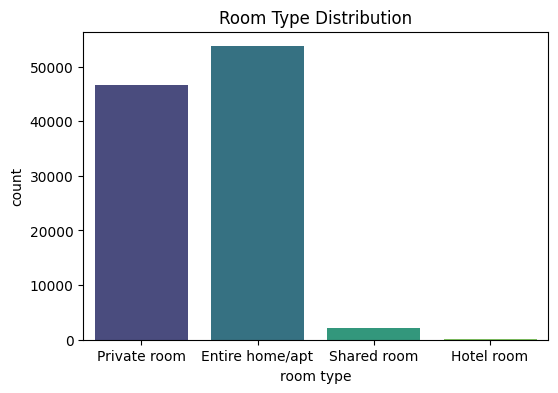

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='room type', palette='viridis')
plt.title('Room Type Distribution')
plt.show()

Neighbourhood vs Price

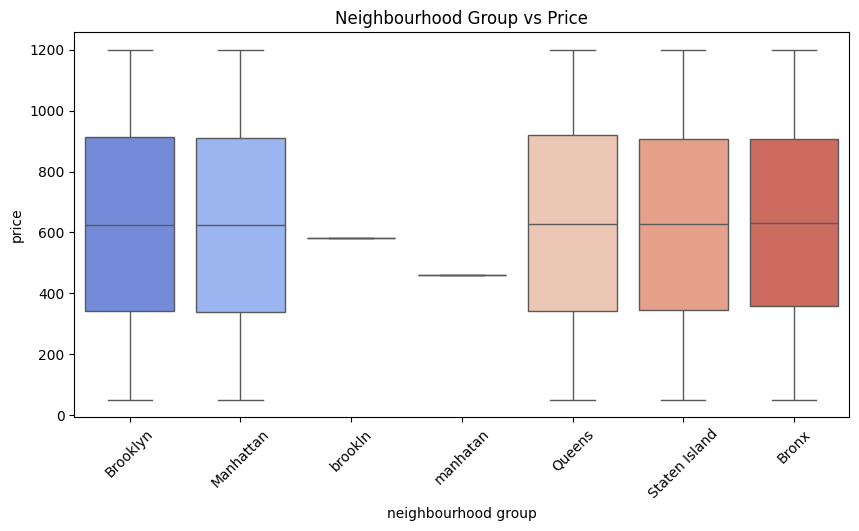

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='neighbourhood group', y='price', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Neighbourhood Group vs Price')
plt.show()

Construction Year vs Price

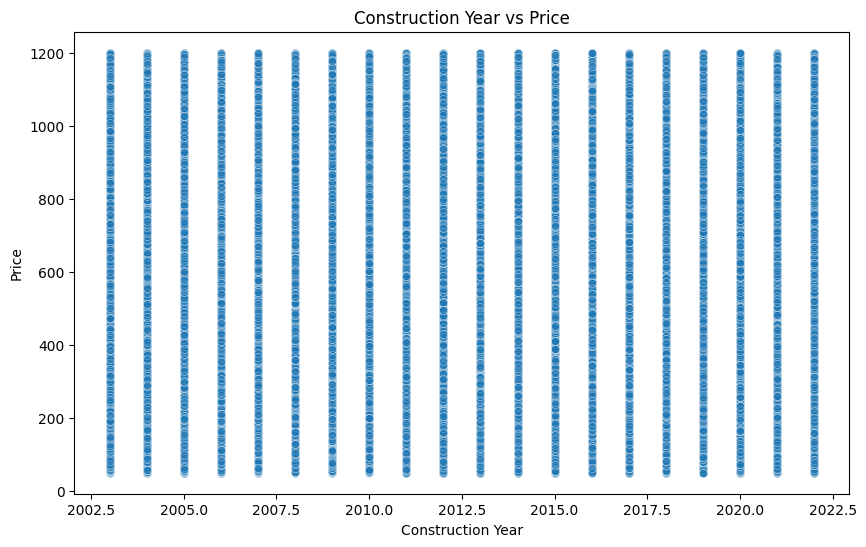

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Construction year', y='price', alpha=0.5)
plt.title('Construction Year vs Price')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.show()

Correlation Analysis

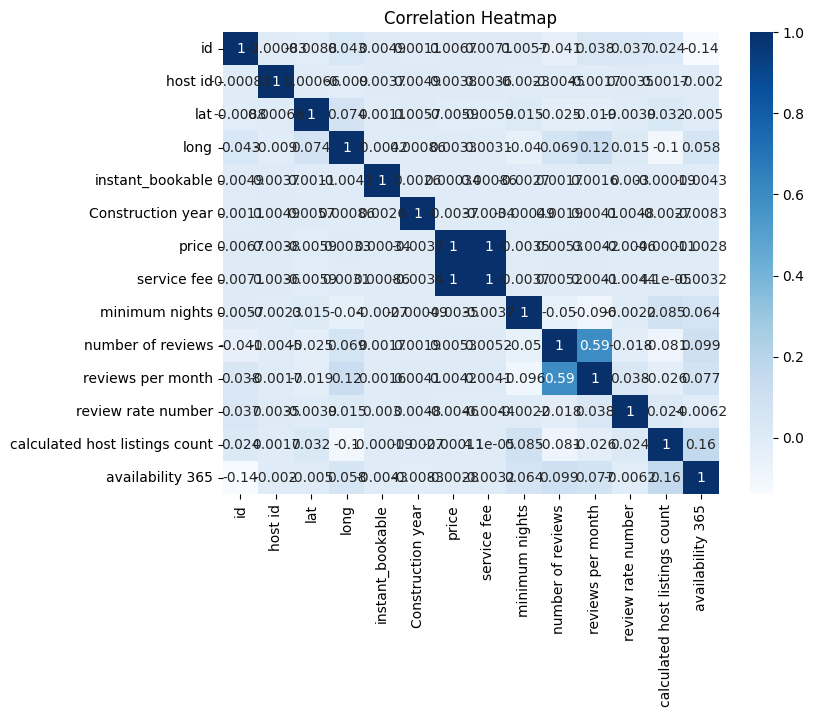

In [41]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Availability vs Price

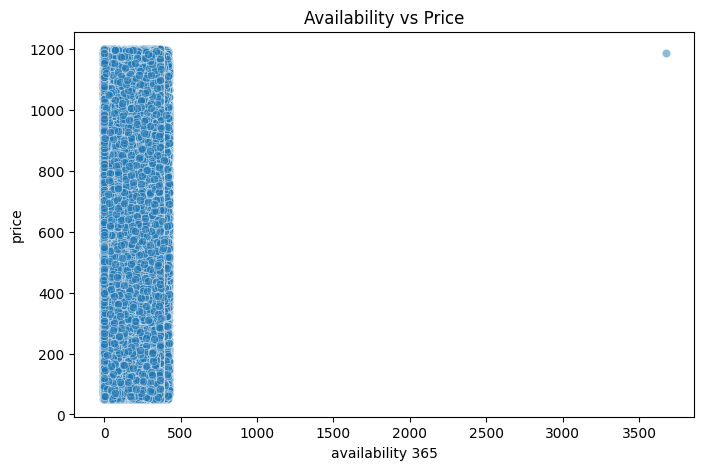

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='availability 365', y='price', alpha=0.5)
plt.title('Availability vs Price')
plt.show()

Host Analysis

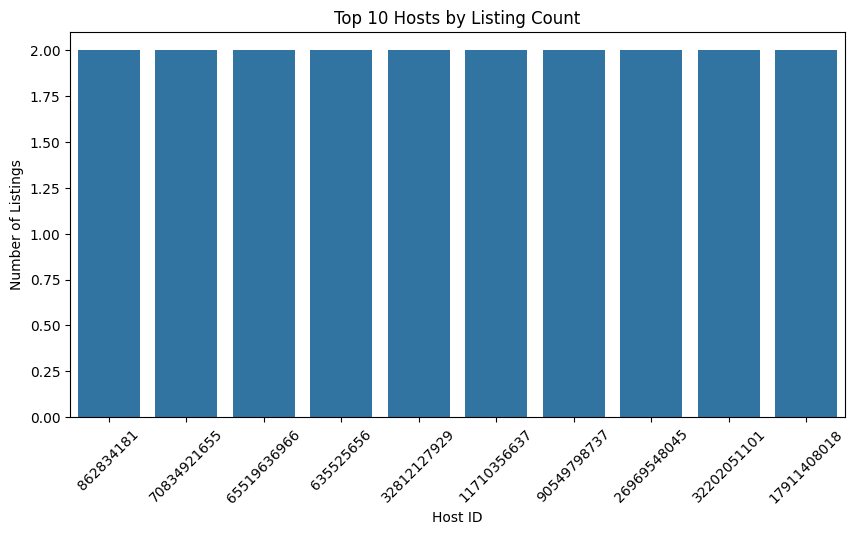

In [43]:
top_hosts = df['host id'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_hosts.index.astype(str), y=top_hosts.values)
plt.xticks(rotation=45)
plt.title('Top 10 Hosts by Listing Count')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.show()

Host with verified identifies

In [44]:
# Analyze review rate number based on host identity verification
review_rate_by_verification = df.groupby('host_identity_verified')['review rate number'].mean()
print("Average Review Rate Number by Host Identity Verification:")
display(review_rate_by_verification)

# Analyze number of reviews based on host identity verification
num_reviews_by_verification = df.groupby('host_identity_verified')['number of reviews'].mean()
print("\nAverage Number of Reviews by Host Identity Verification:")
display(num_reviews_by_verification)

Average Review Rate Number by Host Identity Verification:


,review rate number
host_identity_verified,
unconfirmed,3.271767
verified,3.286684



Average Number of Reviews by Host Identity Verification:


,number of reviews
host_identity_verified,
unconfirmed,27.496035
verified,27.266817


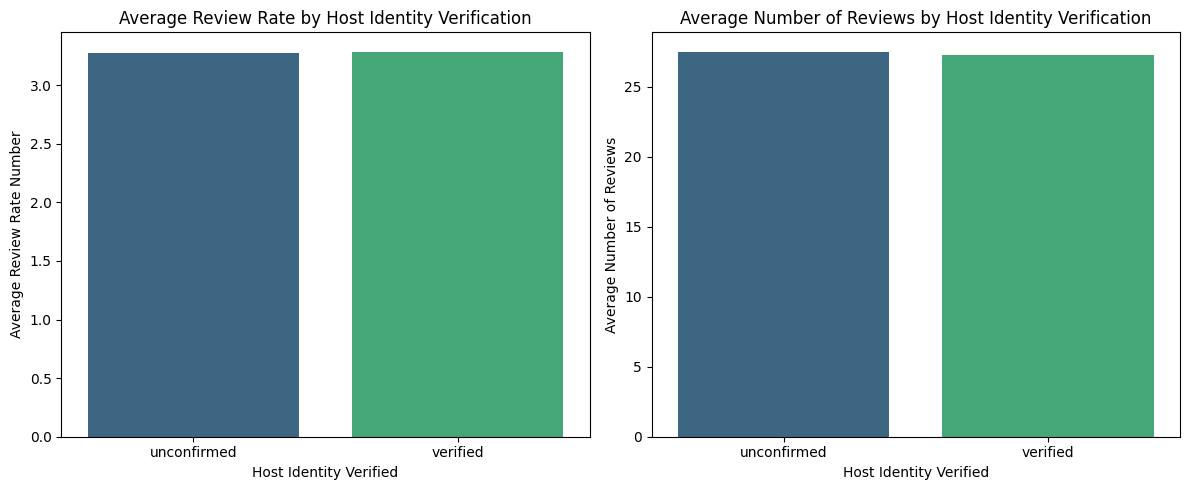

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=review_rate_by_verification.index, y=review_rate_by_verification.values, palette='viridis')
plt.title('Average Review Rate by Host Identity Verification')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rate Number')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.barplot(x=num_reviews_by_verification.index, y=num_reviews_by_verification.values, palette='viridis')
plt.title('Average Number of Reviews by Host Identity Verification')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Average Review rate number

In [46]:
# Filter out 'Hotel room' and drop rows with NaN in relevant columns
filtered_df = df[df['room type'] != 'Hotel room'].dropna(subset=['neighbourhood group', 'room type', 'review rate number'])

# Calculate the average review rate number by neighbourhood group and room type
average_review_rate = filtered_df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()

# Remove rows with 'brookln' and 'manhatan'
average_review_rate = average_review_rate.drop(['brookln', 'manhatan'])


print("Average Review Rate Number by Neighbourhood Group and Room Type")
display(average_review_rate)

Average Review Rate Number by Neighbourhood Group and Room Type


room type,Entire home/apt,Private room,Shared room
neighbourhood group,,,
Bronx,3.346457,3.329706,3.264957
Brooklyn,3.250378,3.264465,3.336983
Manhattan,3.275807,3.277576,3.257459
Queens,3.349154,3.315585,3.377778
Staten Island,3.329087,3.479482,3.533333


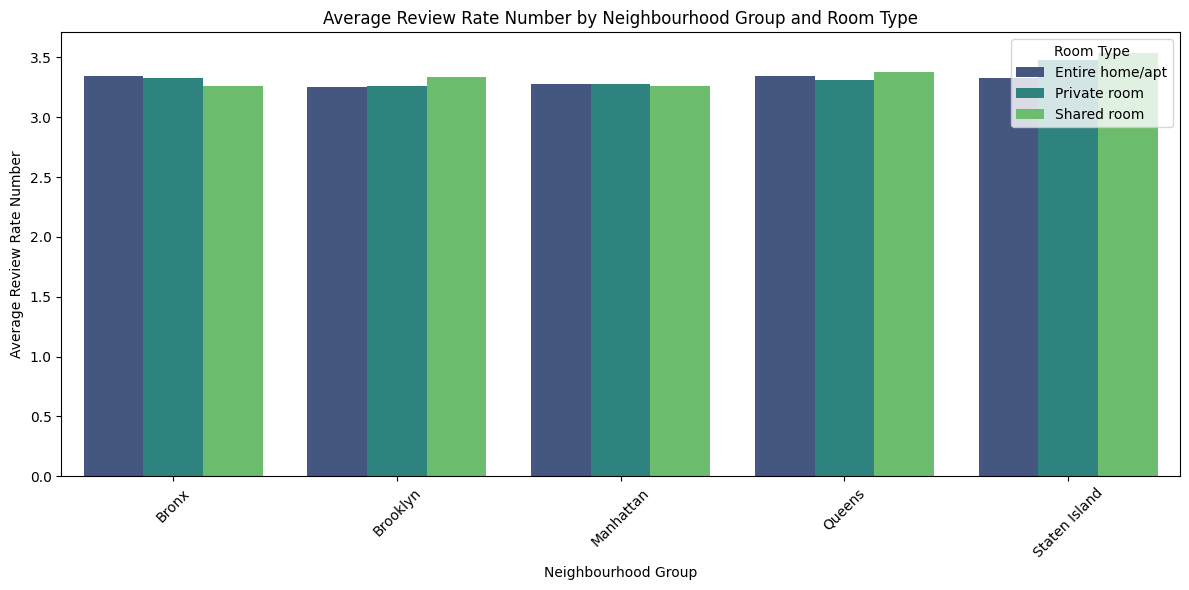

In [47]:
# Melt the DataFrame to a long format for easier plotting with seaborn
average_review_rate_melted = average_review_rate.reset_index().melt(id_vars='neighbourhood group', var_name='Room Type', value_name='Average Review Rate Number')

plt.figure(figsize=(12, 6))
sns.barplot(data=average_review_rate_melted, x='neighbourhood group', y='Average Review Rate Number', hue='Room Type', palette='viridis')
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

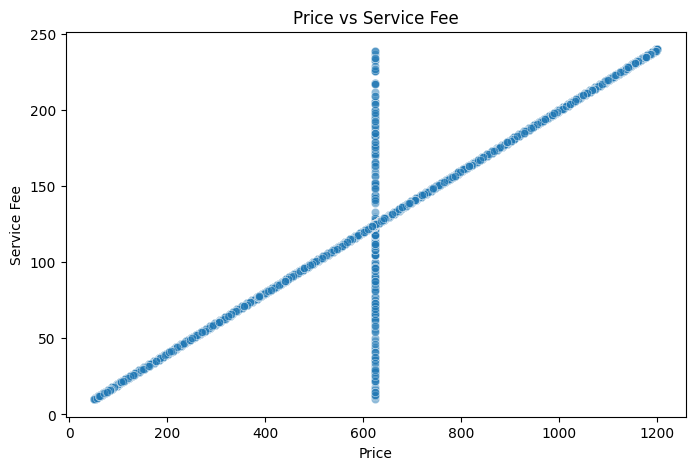


Correlation between Price and Service Fee: 1.00


In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.5)
plt.title('Price vs Service Fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.show()

correlation_price_service_fee = df['price'].corr(df['service fee'])
print(f"\nCorrelation between Price and Service Fee: {correlation_price_service_fee:.2f}")

Host Analysis

## Conclusion

Based on the exploratory data analysis of the Airbnb dataset, we have gained several insights into the factors influencing listing prices, review rates, and host activity:

*   The distribution of prices shows a wide range, with a concentration in the lower to mid-price tiers.
*   'Entire home/apt' is the most common room type, followed by 'Private room'.
*   Neighbourhood groups show variations in average prices, with some areas generally having higher price points than others.
*   There appears to be no strong linear relationship between the construction year of a property and its price.
*   A very strong positive correlation exists between the price of a listing and its service fee.
*   Host identity verification does not appear to have a significant impact on the average review rate or the average number of reviews based on the calculated averages.
*   The average review rate number varies across different neighbourhood groups and room types, suggesting that location and accommodation type can influence guest reviews.
*   Analyzing the top hosts by listing count revealed that some hosts manage a large number of properties, and for the top 10 hosts analyzed, their listings were primarily concentrated in Manhattan.

This analysis provides a foundational understanding of the Airbnb market in this dataset. Further analysis could delve deeper into specific neighbourhood characteristics, the impact of amenities, seasonality, and more advanced modeling techniques to predict prices or review outcomes.